<center>
<img src="../../img/ods_stickers.jpg">


[Материал разработат на основе электронного ресурса](Ю.Кашницкого.https://mlcourse.ai/book/index.html)

# <center>Обучение без учителя
## <center> Кластеризация. Метод k-средних (k-means)

Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Метод может быть сформулирован как задача оптимизации, а именно, минимизации суммарного квадратичного отклонения точек кластеров от центров этих кластеров по центроидам и кластерам:
$$\sum_{i=1}^k \sum_{X_n \in C_i} ||X_n - \mu_i||^2 \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_i$ - это центр масс кластера $C_i$.}$$

Решение такой задачи оптимизации является NP-трудной задачей, однако существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости. 

Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.

1) *Этап кластеризациu.* На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$

2) *Этап обновления центроидов.* На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$

Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.

### Пример: кластеризация игроков NBA

Про <a href="http://www.databasebasketball.com/about/aboutstats.htm">признаки</a> игроков.

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("../../data/nba_2013.csv")
nba.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/nba_2013.csv'

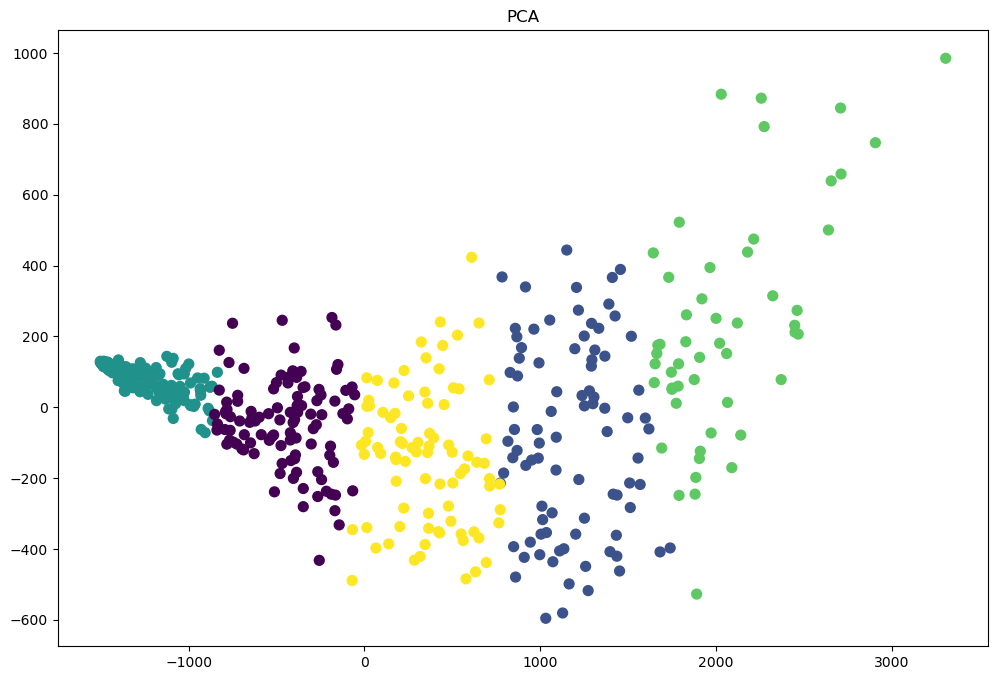

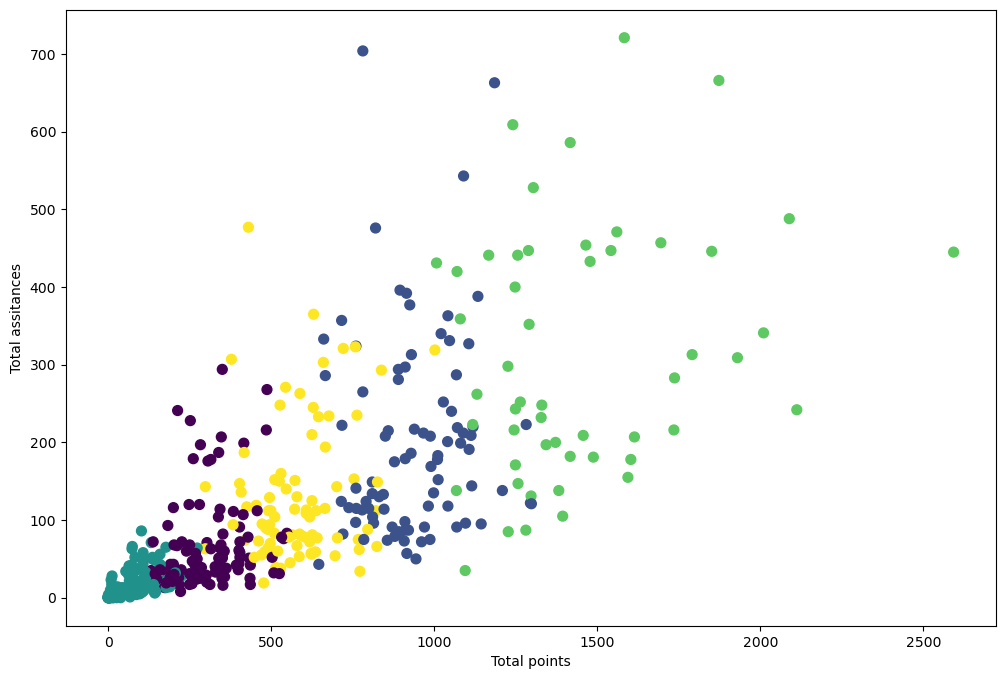

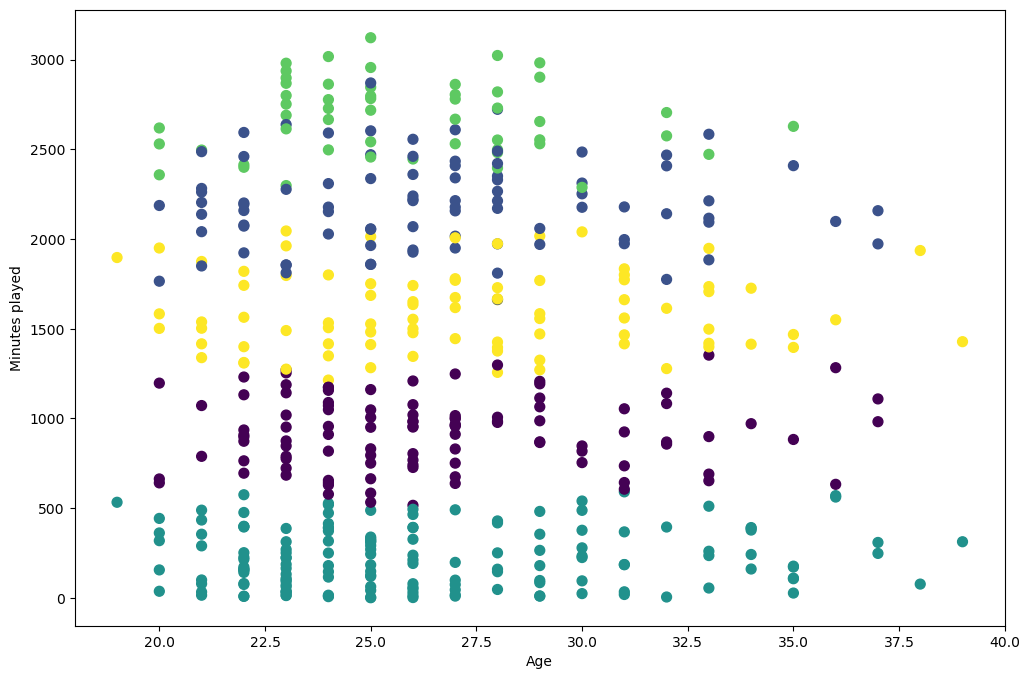

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Визуализация с использованием PCA
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Визуализация с использованием двух функций: общее количество очков и общее количество передач.
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Визуализация с использованием двух функций: возраст и количество сыгранных минут.
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

### Инициализация центроидов

Метод `sklearn.KMeans` содержит параметры `n_init` (число запусков из различных начальных приближений) и `init`. Есть три способа инициализации центроидов:
- `k-means++` – "умная" инициализация центроидов для ускорения сходимости.
- `random` – случайная инициализация центроидов.
- `ndarray` – заданная инициализация центроидов.

## Сжатие изображений с K-means

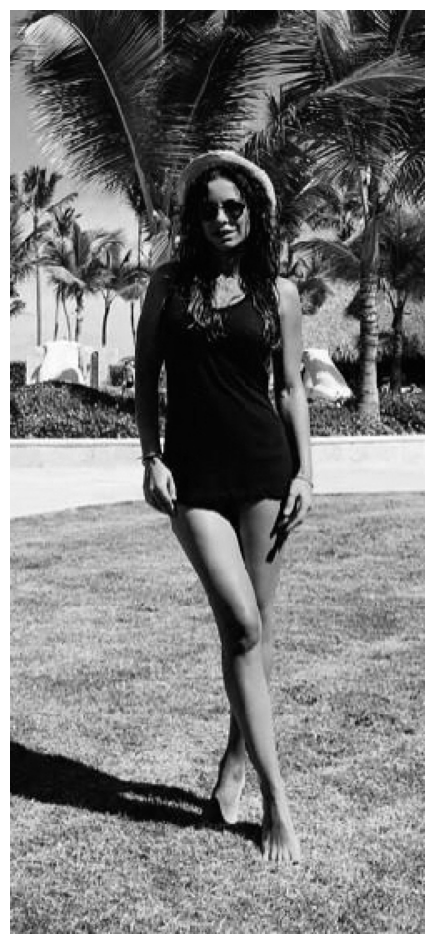

In [ ]:
import matplotlib.image as mpimg

img = mpimg.imread('../../img/woman.jpg')[..., 1]
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img, cmap='gray');

C:\Users\pc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


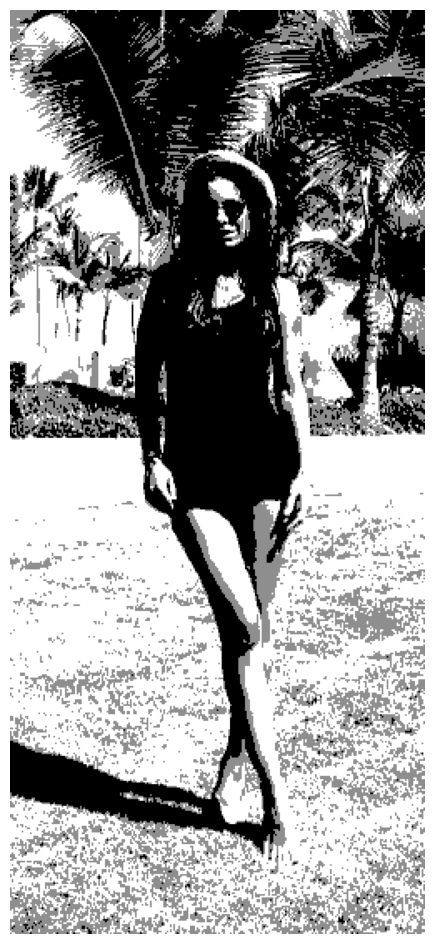

In [ ]:
from scipy.stats import randint
from sklearn.cluster import MiniBatchKMeans

X = img.reshape((-1, 1))
k_means = MiniBatchKMeans(n_clusters=3)
k_means.fit(X)
values = k_means.cluster_centers_
labels = k_means.labels_
img_compressed = values[labels].reshape(img.shape)
plt.figure(figsize = (20, 12))
plt.axis('off')
plt.imshow(img_compressed, cmap = 'gray');

# Нахождение тем в текстах

**Применим KMeans для кластеризации текстов из 4 новостных категорий.**

In [ ]:
from time import time

from sklearn import metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.preprocessing import Normalizer

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space']

print("Загрузка набора данных из 20 групп новостей для категорий:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

labels = dataset.target
true_k = np.unique(labels).shape[0]

Загрузка набора данных из 20 групп новостей для категорий:
['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
3387 documents
4 categories


**Закодируем тексты с помощью TF-IDF признаков.**

In [ ]:
print("Извлечение функций из набора обучающих данных с помощью разреженного векторизатора:")
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000,
                             min_df=2, stop_words='english')

X = vectorizer.fit_transform(dataset.data)
print("n_образцов: %d, n_объектов: %d" % X.shape)

Извлечение функций из набора обучающих данных с помощью разреженного векторизатора:
n_образцов: 3387, n_объектов: 1000


**И применим к получившимся векторам метод $k$ средних.**

In [ ]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

order_centroids = km.cluster_centers_.argsort()[:, ::-1]

Clustering sparse data with KMeans(max_iter=100, n_clusters=4, n_init=1)
Homogeneity: 0.375
Completeness: 0.554
V-measure: 0.447
Adjusted Rand-Index: 0.372
Silhouette Coefficient: 0.013


**Выведем слова, соответствующие самым весомым компонентам центров кластеров.**

In [ ]:
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % (i + 1), end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 1: access digex pat prb net hst online communications com usa
Cluster 2: space com graphics university posting nasa host nntp like thanks
Cluster 3: god com people don article keith say think jesus just
Cluster 4: sandvik kent apple newton com private activities wrote jesus net


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Кластеризация рукописных цифр

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [ ]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

In [ ]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, kmeans.predict(X))

0.6694359093058107

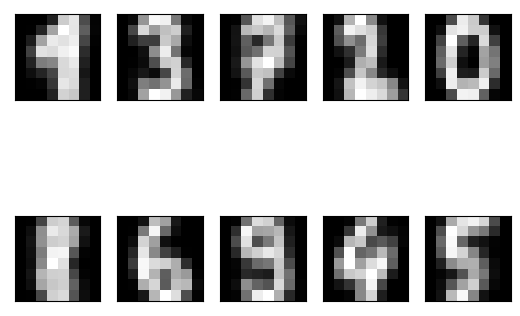

In [ ]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

## Полезные ссылки
- <a href="https://en.wikipedia.org/wiki/K-means_clustering">k-means</a> на Википедии
- <a href="">Статья</a> про нечеткую кластеризацию городов по социально-экономическим показателям на Хабрахабре

## Задание:

1. Произведите методом k-means кластеризацию вин (датасет возьмите из третьей работы). Произведите разные варианты инициализации центров. Сравните результат. 
2. Выберите черно-белое и цветное изображение. Сожмите изображение с помощью метода K-means. 
3. Применим KMeans для кластеризации текстов.  Загрузите «KMeans.zip» отсюда (http://cmj4.web.rice.edu/KMeans.zip). 
Поместите его в каталог KMeans и разархивируйте. Помимо прочего, это создаст каталог «20_Newsgroups», содержащий   набор данных «20Newsgroups». 
Это набор из примерно 20 000 сообщений в 20 различных группах новостей (это что-то вроде блогов 1990-х годов). Каталог «20_newsgroups» будет иметь 
20 подкаталогов, каждый из которых соответствует группе новостей. 
В каждом подкаталоге около 1000 файлов, каждый из которых представляет собой публикацию.
Произведите кластеризацию по 20 кластерам. Оцените, насколько точно ваша кластеризация совпадает с классификацией, произведенной разработчику этого датасета.

--- Задание 1: Кластеризация вин ---


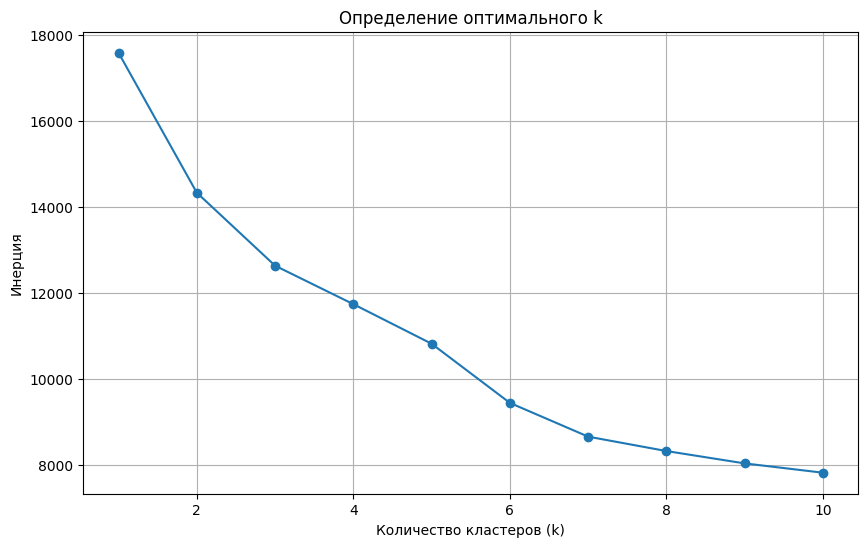

optimal_k = 6


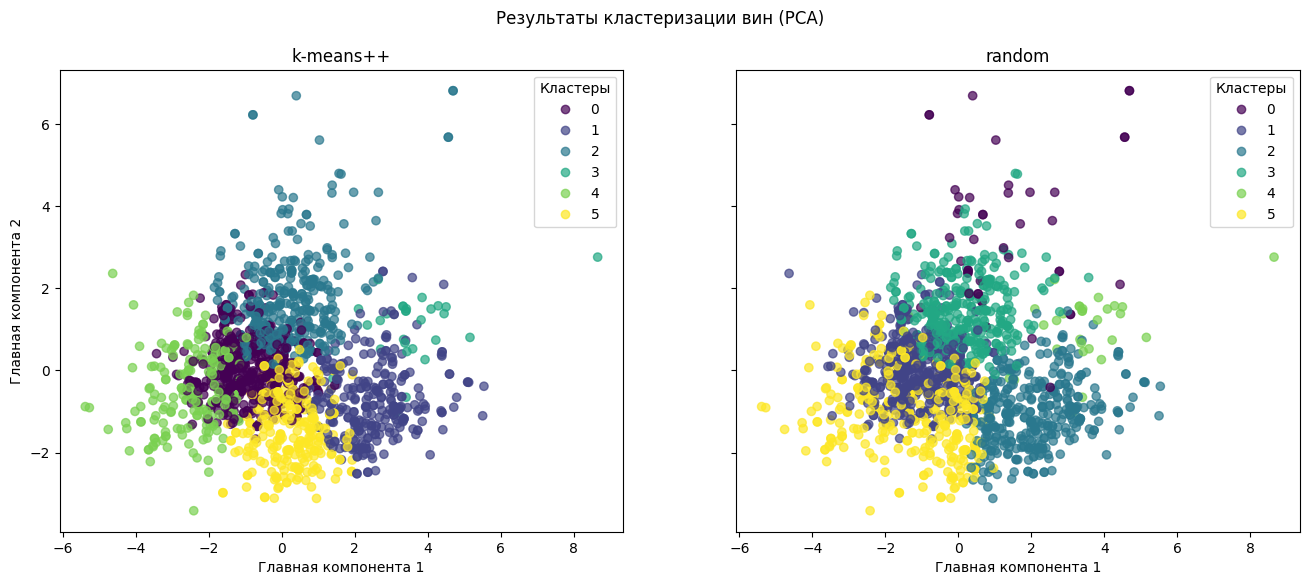


--- Задание 2: Сжатие изображений ---

Сжатие цветного изображения:


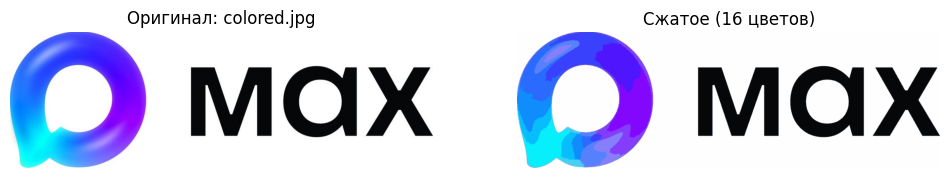


Сжатие изображения:


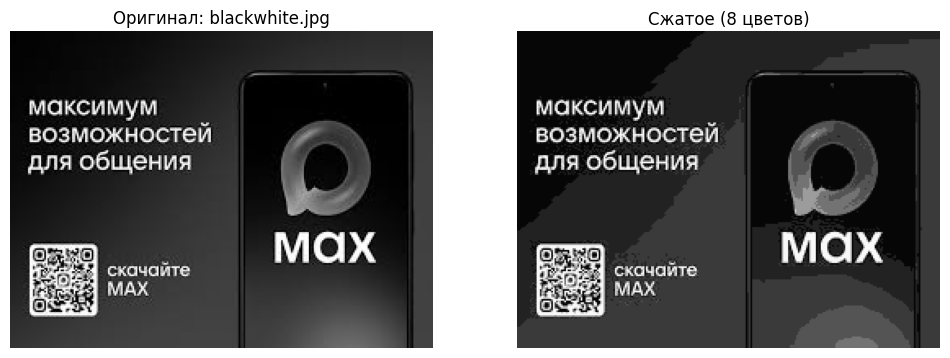


--- Задание 3: Кластеризация текстов ---

Топ-10 слов для каждого кластера:
Кластер 0 (вероятно, soc.religion.christian): rutgers christian athos geneva god religion soc igor hedrick aramis
Кластер 1 (вероятно, sci.med): sci state ohio space gov rec nasa nntp article posting
Кластер 2 (вероятно, rec.autos): hp purdue ecn mentor apollo col cc noose sdd hewlett
Кластер 3 (вероятно, alt.atheism): cwru cleveland ins freenet po reserve usenet western case usa
Кластер 4 (вероятно, rec.sport.baseball): du mnemosyne nyx denver admin account math netnews dept unix
Кластер 5 (вероятно, sci.crypt): clipper digex crypt security org key sci access encryption eff
Кластер 6 (вероятно, rec.autos): uiuc cso cobb illinois urbana ux1 uxa noise owner alexia
Кластер 7 (вероятно, rec.sport.hockey): ca ubc bnr canada bc uwaterloo hockey sfu carleton uwo
Кластер 8 (вероятно, comp.windows.x): mit columbia athena enterpoop ai cunixb gld lcs bedfellow internet
Кластер 9 (вероятно, talk.religion.misc): mchp sni 

In [7]:
# Imports
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
import warnings
import os

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning, message='MiniBatchKMeans is known to have a memory leak on Windows with MKL')

if os.name == 'nt':
    os.environ['OMP_NUM_THREADS'] = '1'

# --- Задание 1: Кластеризация вин ---
print("--- Задание 1: Кластеризация вин ---")

try:
    wine_df = pd.read_csv('winequality-red.csv')
    X_wine = wine_df.drop('quality', axis=1)
    scaler = StandardScaler()
    X_wine_scaled = scaler.fit_transform(X_wine)

    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(X_wine_scaled)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Определение оптимального k')
    plt.xlabel('Количество кластеров (k)')
    plt.ylabel('Инерция')
    plt.grid(True)
    plt.show()

    optimal_k = 6
    print(f"optimal_k = {optimal_k}")

    # 1. k-means++
    kmeans_plus = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init='auto')
    labels_plus = kmeans_plus.fit_predict(X_wine_scaled)
    inertia_plus = kmeans_plus.inertia_

    # 2. random
    kmeans_random = KMeans(n_clusters=optimal_k, init='random', random_state=42, n_init='auto')
    labels_random = kmeans_random.fit_predict(X_wine_scaled)
    inertia_random = kmeans_random.inertia_

    pca = PCA(n_components=2)
    X_wine_pca = pca.fit_transform(X_wine_scaled)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
    fig.suptitle('Результаты кластеризации вин (PCA)')

    scatter1 = ax1.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=labels_plus, cmap='viridis', alpha=0.7)
    ax1.set_title('k-means++')
    ax1.set_xlabel('Главная компонента 1')
    ax1.set_ylabel('Главная компонента 2')
    ax1.legend(*scatter1.legend_elements(), title="Кластеры")

    scatter2 = ax2.scatter(X_wine_pca[:, 0], X_wine_pca[:, 1], c=labels_random, cmap='viridis', alpha=0.7)
    ax2.set_title('random')
    ax2.set_xlabel('Главная компонента 1')
    ax2.legend(*scatter2.legend_elements(), title="Кластеры")

    plt.show()

except FileNotFoundError:
    print("Файл 'winequality-red.csv' не найден.")
except Exception as e:
    print(f"Произошла ошибка в Задании 1: {e}")

# --- Задание 2: Сжатие изображений ---
print("\n--- Задание 2: Сжатие изображений ---")

def compress_image(img_path, n_colors):
    try:
        img = mpimg.imread(img_path)

        if len(img.shape) == 2:
            img = np.stack([img]*3, axis=-1)
        elif img.shape[2] == 4:
            img = img[..., :3]

        # Нормализация
        if img.max() > 1.0:
            img = img / 255.0

        pixels = img.reshape(-1, 3)

        kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init='auto')
        kmeans.fit(pixels)

        new_pixels = kmeans.cluster_centers_[kmeans.labels_]
        new_img = new_pixels.reshape(img.shape)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title('Оригинал: ' + os.path.basename(img_path))
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f'Сжатое ({n_colors} цветов)')
        plt.imshow(new_img)
        plt.axis('off')
        plt.show()

    except FileNotFoundError:
        print(f"Файл '{img_path}' не найден.")
    except Exception as e:
        print(f"Ошибка при обработке '{img_path}': {e}")

print("\nСжатие цветного изображения:")
compress_image('colored.jpg', 16)

print("\nСжатие изображения:")
compress_image('blackwhite.jpg', 8)


# --- Задание 3: Кластеризация текстов ---
print("\n--- Задание 3: Кластеризация текстов ---")

try:
    path = 'KMeans/20_newsgroups'
    dataset = load_files(path, encoding='latin1')
    vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')
    X_text = vectorizer.fit_transform(dataset.data)

    true_k = np.unique(dataset.target).shape[0]
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10, random_state=42)
    km.fit(X_text)

    print("\nТоп-10 слов для каждого кластера:")
    terms = vectorizer.get_feature_names_out()
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    for i in range(true_k):
        labels_in_cluster = dataset.target[km.labels_ == i]
        if len(labels_in_cluster) > 0:
            most_common_label_idx = np.bincount(labels_in_cluster).argmax()
            cluster_name = dataset.target_names[most_common_label_idx]
            print("Кластер %d (вероятно, %s):" % (i, cluster_name), end='')
        else:
            print("Кластер %d (пустой):" % i, end='')

        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()

except FileNotFoundError:
    print("нет каталога")
except Exception as e:
    print(f"Ошибка: {e}")